# Домашнее задание 2 | EDA

**Общие моменты:**

* Обязательно гуглите всю необходимую информацию. Вы можете использовать прочие (которые не упоминались на занятиях) методы и алгоритмы для решения задач, но при условии, что Вы сможете их объяснить. Если Вы нашли какой-то интересный способ решения, то нужно в комментарий добавить ссылку на источник.

* Списывать/плагиатить строго запрещено. Можно использовать готовые решения из интернета только в случае, если Вы укажите ссылку на источник. И поясните, почему лучше так, а не каким-то стандартным (рекомендуемым) способом.

* Желательно (но не обязательно) указывать комментарии в Вашем решении. Это и Вам поможет понять, что Вы делаете. И также это поможет преверяющему в случае вопросов.

* Технологии типа ChatGPT не использовать.

* В случае каких-то вопросов или спорных ситуаций (например, после получения результатов дз), обращайтесь к ассистенту/преподавателю. И лучше пишите какие-то комментарии к своему коду, чтобы спорных ситуаций было как можно меньше.

* Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов (+ бонус). Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

* Сдавать ДЗ в SmartLMS!

**Успехов!**

## Данные:

Вам предлагается использовать в качестве датасета списки размещения Airbnb в любом понравившимся вам городе.

Информация о наборе данных и загрузка: http://insideairbnb.com/get-the-data.html

Датасет содержит следующие атрибуты:

* id: Уникальный идентификатор объявления.
* name: Название объявления.
* host_id: Уникальный идентификатор хозяина.
* host_name: Имя хозяина.
* neighbourhood_group: Группа районов.
* neighbourhood: Название района.
* latitude: Широта местоположения жилья.
* longitude: Долгота местоположения жилья.
* room_type: Тип комнаты (например, "Отдельная комната" или "Жилье целиком").
* price: Цена за ночь в евро. 
* minimum_nights: Минимальное количество ночей, которое необходимо забронировать.
* number_of_reviews: Общее количество отзывов.
* last_review: Дата последнего отзыва.
* reviews_per_month: Среднее количество отзывов в месяц.
* calculated_host_listings_count: Общее количество объявлений хозяина.
* availability_365: Количество доступных дней для бронирования в течение следующих 365 дней.
* number_of_reviews_ltm: Количество отзывов за последние 12 месяцев. Показывает активность объекта размещения за последний год.
* licence: Номер лицензии объекта размещения. Указывает на наличие лицензии у хозяина для предоставления услуг сдачи жилья. Может содержать пропущенные значения, если лицензия не предоставлена или не требуется.

## Задание 1 (0.25 балла): Загрузка и чтение данных

* Загрузите набор данных с сайта Inside Airbnb: http://insideairbnb.com/get-the-data.html. Выберите файл "listings.csv" для города, который Вам приглянулся. Для удобства проверки укажите в комментарии выбранный город.

* Прочитайте данные и выведите первые 5 строк DataFrame, чтобы убедиться, что данные загружены и считаны правильно.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

- Я выбрал New York

In [2]:
data = pd.read_csv('listings.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,49,2022-06-21,0.30,3,314,1,NaN
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.30,2,365,0,NaN
2,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.72,1,0,0,NaN
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,575,2023-02-19,3.41,1,106,52,NaN
4,5136,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,60,3,2022-08-10,0.03,1,181,1,NaN


**Критерии оценки:**

* Успешная загрузка набора данных и его чтение в виде DataFrame.
* Предоставление вывода с первыми 5 строками, чтобы показать, что данные считаны правильно.

## Задание 2 (1.25 балла): Предобработка данных

* Исследуйте пропущенные значения в наборе данных. Определите столбцы с большим количеством пропущенных значений.

* Удалите дубликаты строк и обработайте все пропуски.

* Преобразуйте типы данных при необходимости. Например, если столбец 'last_review' имеет тип данных object, преобразуйте его в формат datetime.

* Выведите информацию о DataFrame для проверки успешного выполнения всех операций предварительной обработки.

In [3]:
data.isnull().sum()

id                                    0
name                                 12
host_id                               0
host_name                             5
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10304
reviews_per_month                 10304
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           42930
dtype: int64

In [4]:
data.shape

(42931, 18)

- Больше всего пропущеных значений в столбце Лицензии, также в Дата последнего отзыва и Среднее количество отзывов в месяц.

In [5]:
data.duplicated().unique()

array([False])

- Дубликатов нет

In [6]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [7]:
# Удалим 17 строк с пустыми значениями в name и host_name, это никак не повлияет так как данных 42931
data=data[data.name.isin(data.name.dropna())]
data=data[data.host_name.isin(data.host_name.dropna())]

# Так как по условию пропущенное значении в лицензии, это скорее всего значит что она не требуется , то заменю 
# на произвольное значение
data.license=data.license.fillna('freeLic')

# Так как в столбе уже дается среднее, то заменим пустые на моду(самое часто встречающееся значение)
data.reviews_per_month=data.reviews_per_month.fillna(data.reviews_per_month.mode().iloc[0])

# Преобразуем из  object в дату, для дальнейшего удобства и чтобы заменить на среднее
data.last_review = pd.to_datetime(data.last_review)
data.last_review=data.last_review.fillna(data.last_review.mean())

In [8]:
data.isnull().sum().sum()

0

- Избавились от пустых значений 

In [9]:
data.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
license                                   object
dtype: object

- После преобразования last_review, все остальные значения соответствуют

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42914 entries, 0 to 42930
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              42914 non-null  int64         
 1   name                            42914 non-null  object        
 2   host_id                         42914 non-null  int64         
 3   host_name                       42914 non-null  object        
 4   neighbourhood_group             42914 non-null  object        
 5   neighbourhood                   42914 non-null  object        
 6   latitude                        42914 non-null  float64       
 7   longitude                       42914 non-null  float64       
 8   room_type                       42914 non-null  object        
 9   price                           42914 non-null  int64         
 10  minimum_nights                  42914 non-null  int64         
 11  nu

**Критерии оценки:**

* Проведение анализа пропущенных значений и принятие решения о их обработке.
* Удаление дубликатов и корректное изменение типов данных при необходимости.
* Предоставление вывода о структуре и типах данных DataFrame после предварительной обработки.

## Задание 3 (1.25 балла): Исследование выбросов

* Визуализируйте распределения числовых столбцов, таких как 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count' и 'availability_365', используя графики ящика с усами (boxplots) или гистограммы.

* Используя визуализации, определите наличие выбросов в числовых столбцах и примите решение о том, как их обработать

* После обработки выбросов визуализируйте распределения числовых столбцов снова, чтобы убедиться, что выбросы были успешно обработаны.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
def create_distribition(graph, tit):
    plt.figure(figsize=(6,5))
    plt.hist(data[graph], bins=80)
    plt.title(tit)
    plt.show()

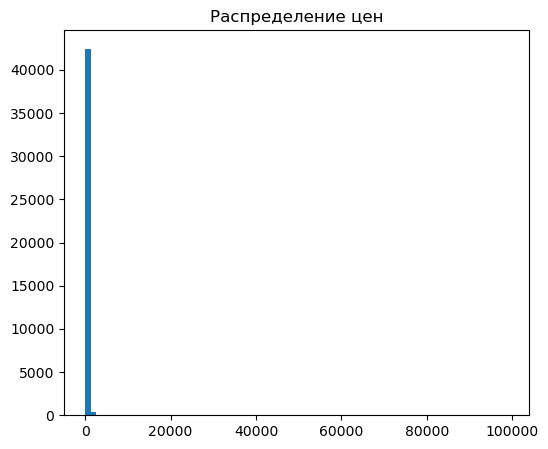

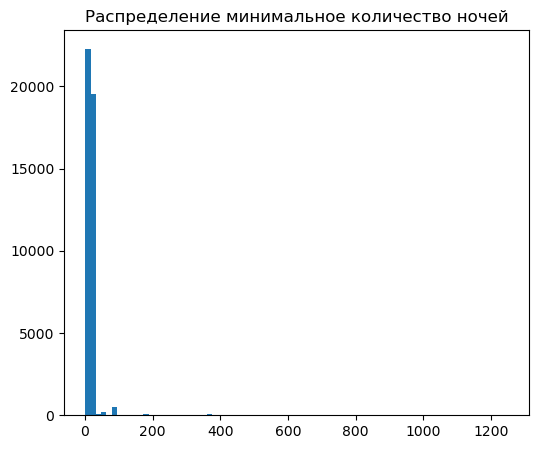

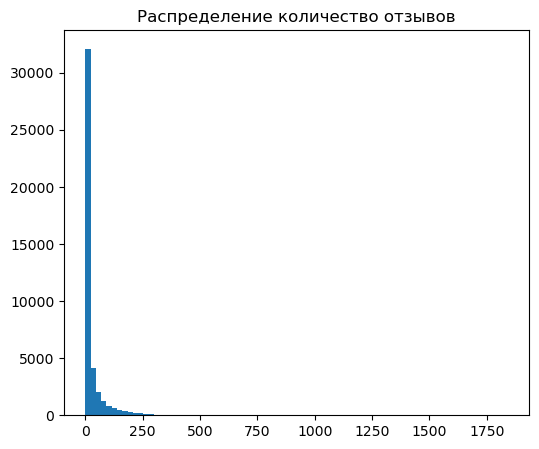

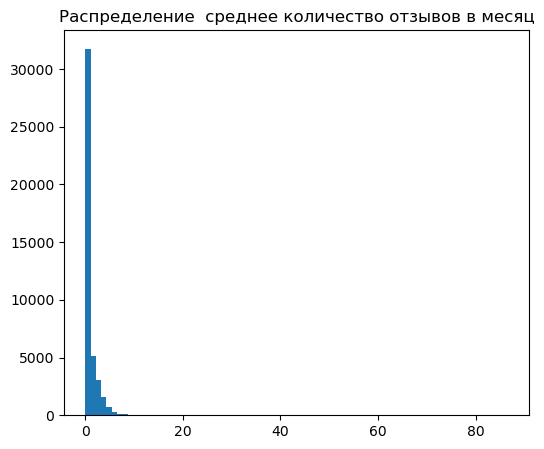

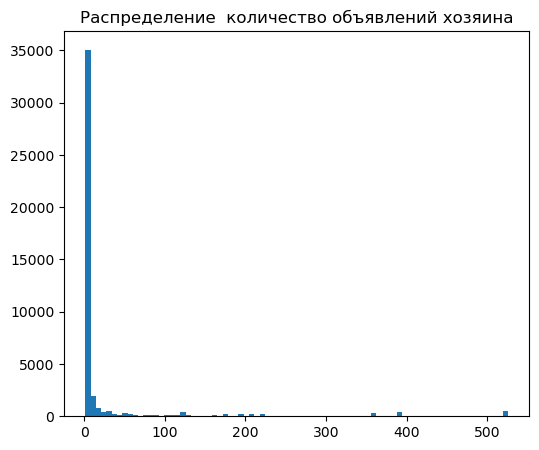

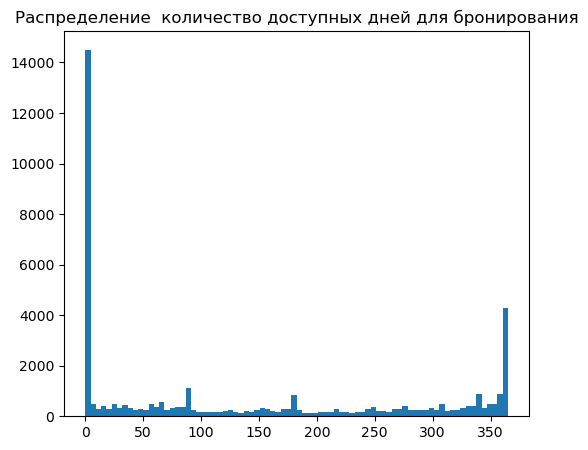

In [13]:
graph=['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
tit=['Распределение цен', 'Распределение минимальное количество ночей',
     'Распределение количество отзывов',
     'Распределение  среднее количество отзывов в месяц',
     'Распределение  количество объявлений хозяина',
     'Распределение  количество доступных дней для бронирования']
for i, j in zip(graph, tit):
    create_distribition(i, j)

- Выбросы есть посмторим на price и избавимся от них

In [14]:
val1=data.price.quantile(0.95)
data=data[data["price"]<val1]

- Выбросы есть посмторим на minimum_nights и избавимся от них

In [15]:
val1=data.minimum_nights.quantile(0.9)
data=data[data["minimum_nights"]<=val1]

- Выбросы есть посмторим на number_of_reviews и избавимся от них

In [16]:
val1=data.number_of_reviews.quantile(0.95)
data=data[data["number_of_reviews"]<val1]

- Выбросы есть посмторим на reviews_per_month и избавимся от них

In [17]:
val1=data.reviews_per_month.quantile(0.95)
data=data[data["reviews_per_month"]<val1]

- Выбросы есть посмторим на calculated_host_listings_count и избавимся от них

In [18]:
val1=data.calculated_host_listings_count.quantile(0.9)
data=data[data["calculated_host_listings_count"]<val1]

- Выбросы есть посмторим на availability_365 и избавимся от них

In [19]:
val1=data.availability_365.quantile(0.95)
data=data[data["availability_365"]<val1]

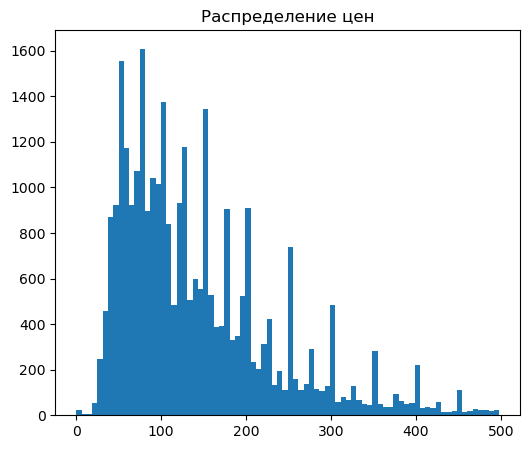

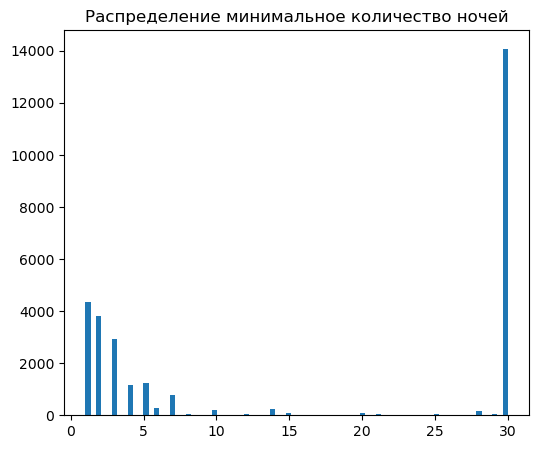

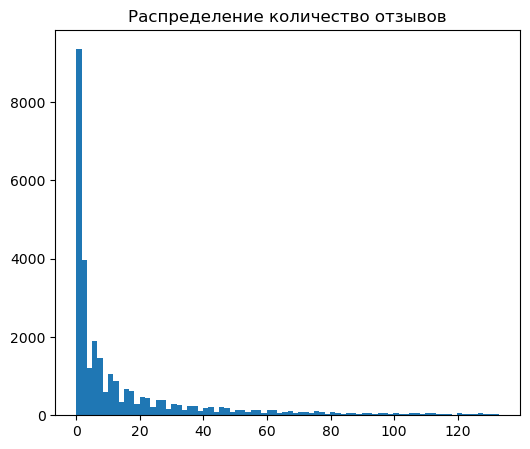

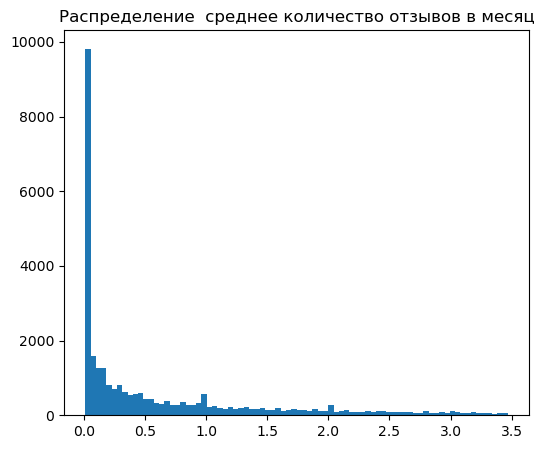

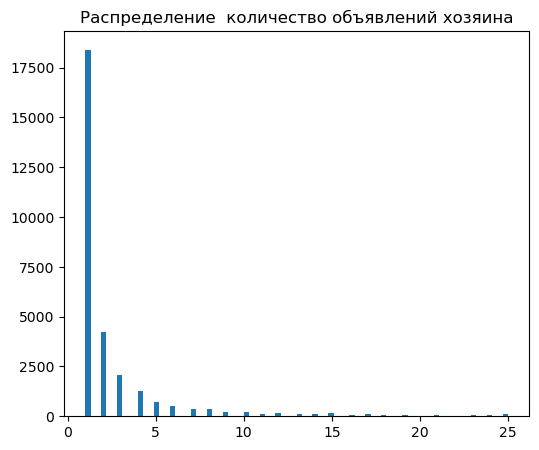

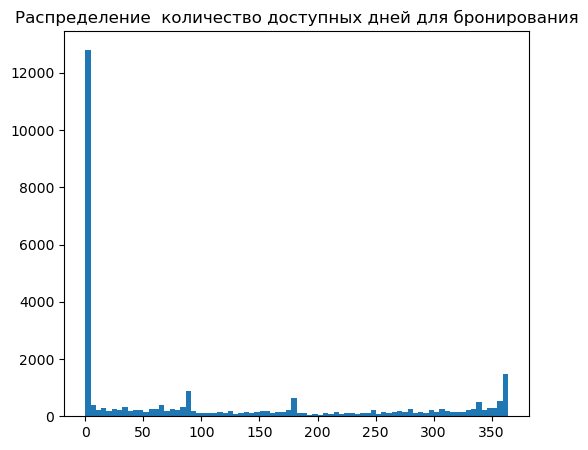

In [20]:
for i, j in zip(graph, tit):
    create_distribition(i, j)

- Так выглядит намного лучше

**Критерии оценки:**

* Визуализация распределений числовых столбцов для выявления выбросов.
* Принятие обоснованного решения о том, как обработать выбросы и успешное выполнение соответствующих операций.
* Предоставление графиков до и после обработки выбросов для демонстрации успешной обработки.

## Задание 4 (1.75 балл): Создание новых признаков

* Создайте признак 'distance_to_city_center_km', который вычисляет расстояние от каждого объекта размещения до центра города. В качестве координат центра используйте значения с сайта: https://batchgeo.com/map/latitude-longitude

* Создайте новый признак "days_since_last_review" на основе столбца 'last_review'. Это может быть полезно для определения свежести отзывов и активности размещения.

* Создайте новый признак "booking_rate" на основе столбцов 'availability_365' и 'number_of_reviews'. Это может быть полезно для определения популярности размещения.

* Проведите анализ созданных признаков: исследуйте распределения

* Выведите информацию о DataFrame и первые 5 строк, чтобы убедиться, что новые признаки были успешно созданы.

- Посчитаем расстояние 

In [21]:
import numpy as np
data['distance_to_city_center_km']=12742*np.arcsin(np.sqrt(0.5 - np.cos((40.66-data.latitude)*(np.pi/180))/2 + np.cos(data.latitude*(np.pi/180)) * np.cos(40.66*(np.pi/180)) * (1-np.cos((-73.93-data.longitude)*(np.pi/180)))/2))

- Посчитаем количество дней 

In [22]:
from datetime import date
today_date = date.today()
data['last_review'] = pd.to_datetime(data['last_review'], errors='coerce')
data.last_review=data.last_review.dt.date
data['days_since_last_review']=today_date-data.last_review
data['days_since_last_review'] = data['days_since_last_review'].dt.days

- Посчитаем booking_rate

In [23]:
data['booking_rate'] = data.availability_365*data.number_of_reviews/100

- Исследуем распределения

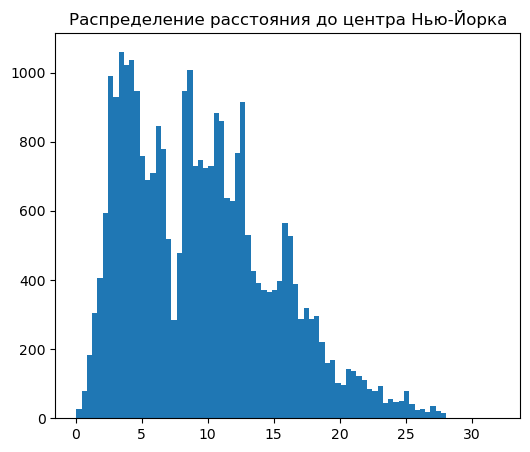

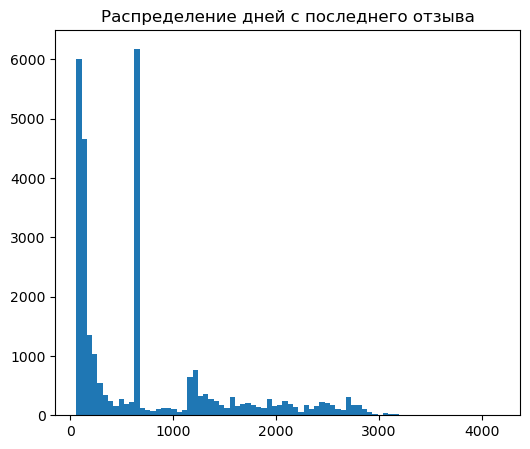

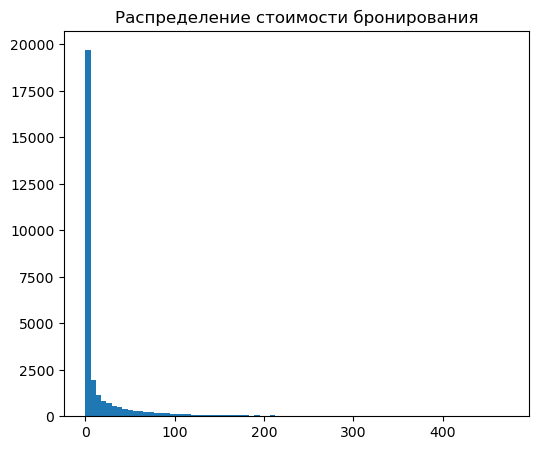

In [24]:
graph=['distance_to_city_center_km', 'days_since_last_review', 'booking_rate']
tit=['Распределение расстояния до центра Нью-Йорка', 
     'Распределение дней с последнего отзыва',
     'Распределение стоимости бронирования']
for i, j in zip(graph, tit):
    create_distribition(i, j)

- Видно что есть выбросы в днях и стоимости брони, уберем их 

In [25]:
val1=data.booking_rate.quantile(0.95)
data=data[data["booking_rate"]<val1]

In [26]:
val1=data.days_since_last_review.quantile(0.99)
data=data[data["days_since_last_review"]<val1]

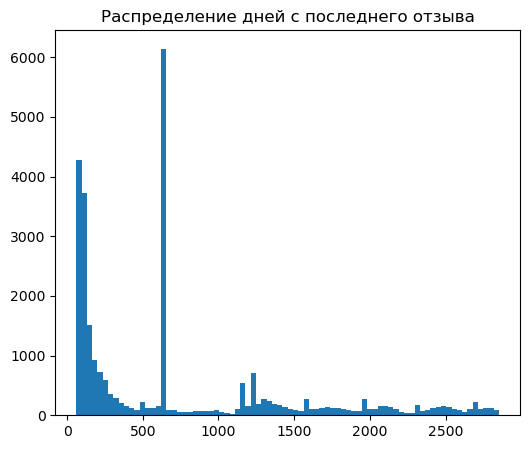

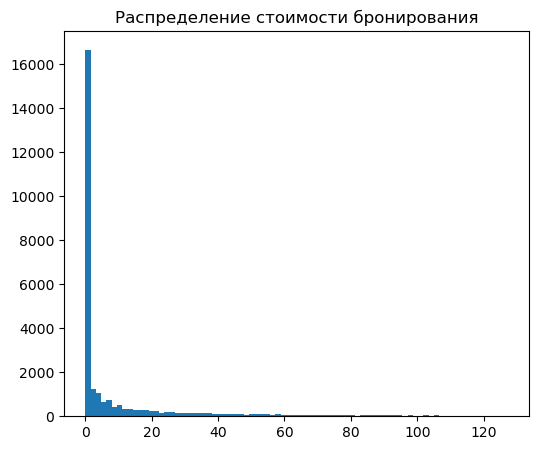

In [27]:
graph=['days_since_last_review', 'booking_rate']
tit=['Распределение дней с последнего отзыва',
     'Распределение стоимости бронирования']
for i, j in zip(graph, tit):
    create_distribition(i, j)

- Стало намного лучше

In [28]:
data.last_review = pd.to_datetime(data.last_review)
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,distance_to_city_center_km,days_since_last_review,booking_rate
2,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,...,118,2017-07-21,0.72,1,0,0,freeLic,16.299205,2115,0.00
6,5586,Rooftop Deck/City Views. Great Apt,8526,Susan,Manhattan,Upper East Side,40.76076,-73.96156,Entire home/apt,295,...,45,2022-10-03,0.27,1,1,4,freeLic,11.515461,215,0.45
10,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,Kae,Manhattan,East Harlem,40.80107,-73.94255,Private room,65,...,1,2022-06-05,0.11,2,204,1,freeLic,15.721873,335,2.04
11,67288,Central Park 1BR sunny condo,101597,Per,Manhattan,East Harlem,40.79544,-73.94836,Entire home/apt,250,...,47,2022-12-14,0.37,1,81,9,freeLic,15.139499,143,38.07
12,31555,Luminous Beautiful West Village Studio,135619,Tom,Manhattan,West Village,40.73405,-74.00281,Entire home/apt,120,...,32,2021-03-27,0.22,1,0,0,freeLic,10.270154,770,0.00


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27955 entries, 2 to 42929
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              27955 non-null  int64         
 1   name                            27955 non-null  object        
 2   host_id                         27955 non-null  int64         
 3   host_name                       27955 non-null  object        
 4   neighbourhood_group             27955 non-null  object        
 5   neighbourhood                   27955 non-null  object        
 6   latitude                        27955 non-null  float64       
 7   longitude                       27955 non-null  float64       
 8   room_type                       27955 non-null  object        
 9   price                           27955 non-null  int64         
 10  minimum_nights                  27955 non-null  int64         
 11  nu

**Критерии оценки:**

* Создание новых признаков на основе существующих данных.
* Анализ распределения новых признаков.
* Предоставление вывода о структуре и типах данных DataFrame после создания новых признаков.

## Задание 5 (1.5 балла): Время статистики!

* Рассчитайте описательные статистики для категориальных переменных. Опишите, какие выводы вы можете сделать из полученных данных.

* Рассчитайте описательные статистики для числовых переменных. Опишите, какие выводы вы можете сделать из полученных данных для хотя бы трех признаков.

* Выберите 3 интересующих вас числовых признака и рассчитайте релевантные описательные статистики для этих признаков, сгруппировав данные по категориальным переменным, таким как 'room_type', 'neighbourhood_group' или 'property_type'. Какие закономерности вы можете отметить? Как их можно проинтерпретировать?

In [30]:
data.describe(include='object')

,name,host_name,neighbourhood_group,neighbourhood,room_type,license
count,27955,27955,27955,27955,27955,27955
unique,27408,8042,5,221,4,2
top,Midtown 45 Hotel Room,David,Brooklyn,Bedford-Stuyvesant,Entire home/apt,freeLic
freq,18,244,11673,2163,15531,27954


- Интересно что большинство объявлений находится в Бруклине, а сдают в городе в осноном квартиры, поэтому лицензия не требуется. Уникальных типов размещений всего лишь 4. А объявлений больше всего в округе Bedford-Stuyvesant

In [31]:
a=data.describe()
a=a.drop(columns=['id', 'host_id']) #удалим id для удобства
a

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,distance_to_city_center_km,days_since_last_review,booking_rate
count,27955.000000,27955.000000,27955.000000,27955.000000,27955.000000,27955.000000,27955.000000,27955.000000,27955.000000,27955.000000,27955.000000,27955.000000
mean,40.726735,-73.943070,142.354784,16.383688,13.151959,0.584992,2.572778,101.199750,4.381113,9.561310,721.827902,11.598596
std,0.058908,0.056006,90.942660,13.521505,21.293652,0.800656,3.610284,128.320367,8.314315,5.483743,744.314774,23.624872
min,40.500314,-74.251907,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,0.055952,61.000000,0.000000
25%,40.686720,-73.979315,75.000000,2.000000,1.000000,0.020000,1.000000,0.000000,0.000000,4.816174,125.000000,0.000000
50%,40.719900,-73.951319,120.000000,15.000000,4.000000,0.200000,1.000000,29.000000,0.000000,8.949069,627.000000,0.000000
75%,40.762500,-73.925174,189.000000,30.000000,16.000000,0.860000,2.000000,180.000000,5.000000,12.879439,1155.000000,10.200000
max,40.911380,-73.710870,498.000000,30.000000,133.000000,3.470000,25.000000,364.000000,80.000000,32.067069,2854.000000,127.300000


- Хочется посмотреть на среднюю цену, но выше по графику видно что распределение в основном лежит до 100, поэтому возьмем медиану или 50 кватиль, а он равен 120. Но при этом отклонение от среднего составляет 90, учитывая что минимальная цена 0, проведем доп исследование чтобы понять сколько квартир сдается по цене 0

In [32]:
data[data.price==0].shape[0]

23

- Их всего 23, и скорее всего это ошибки в данных, ведь если стоит цена за аренду 0, то возможно в объявлении присутствовал доп коментарий на разъяснения этих условий, который не вошел в данные

- Также необычно что среднее колличество ночей 16, значит владельцы предпочитают сдавать жилье на длительные сроки, это можно понять если посмотреть на максимальное значение, которое равно 30 дням 

- Очень большое отклонение в количеству доступных дней для бронирования в течение следующих 365 дней. И большая разница между средним и медианным значением. Построим график и посмотрим как это выглядит

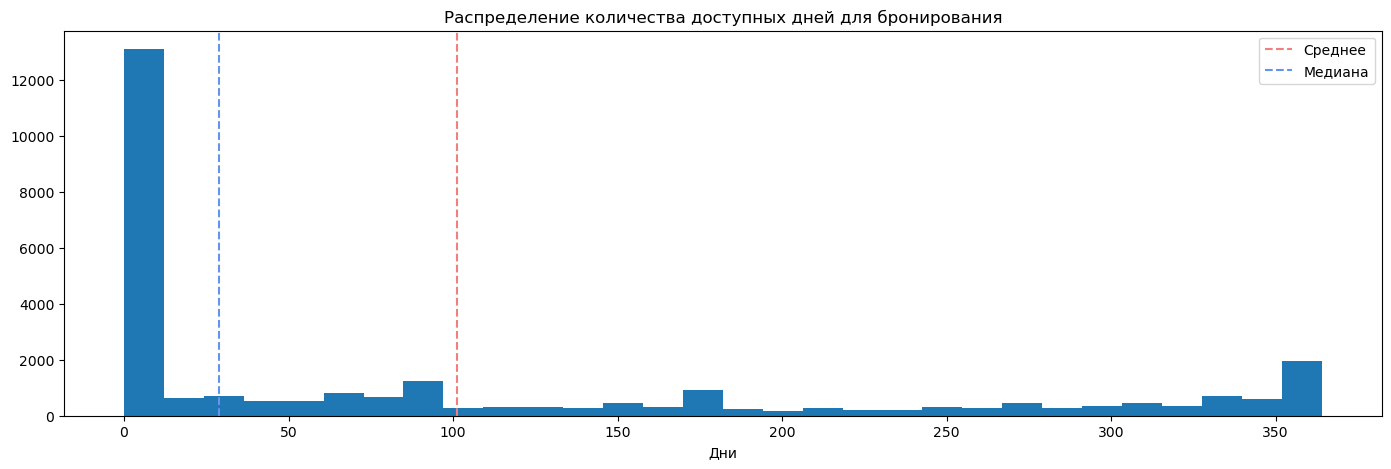

In [33]:
plt.figure(figsize=(17,5))
plt.hist(data['availability_365'], bins=30)
plt.title('Распределение количествa доступных дней для бронирования')
plt.xlabel('Дни')

mean = data['availability_365'].mean() 
median = data['availability_365'].median()  

plt.axvline(mean, linestyle='--', color='#F08080', label='Среднее')
plt.axvline(median, linestyle='--', color='#6495ED', label='Медиана')

plt.legend(loc='best')
plt.show()

- Из графика видно, что большинство объявлений доступно для съема не больше месяца, в дальнейшем проведя доп исследование можно сделать вывод о том, являются ли эти размещения желанными, тогда и цена на них будет отличаться, или эти объявления катируются только когда хозяин уезжает в отпуск на месяц и сдает свое жилье. Или хозяин публикует даты на сайте когда ему удобно

- Чтобы лучше разобраться в ценообразовании сгруппируем по типу аренды и посчитаем медианное значение для цен

In [34]:
data.groupby('room_type')['price'].median().sort_values()

room_type
Shared room         57.0
Private room        71.0
Entire home/apt    164.0
Hotel room         248.0
Name: price, dtype: float64

- Как видно из получившейся таблицы ценнообразование вполне логичное для выбранной области, самым дорогим является номер в отеле 248 евро, а самым дешевым хостел 57 евро

- Так же давайте посмотрим в каких районах сдаются квартиры на более длительные сроки

In [35]:
data.groupby('neighbourhood_group')['minimum_nights'].median().sort_values()

neighbourhood_group
Bronx             3.0
Queens            3.0
Staten Island     3.0
Brooklyn         15.0
Manhattan        30.0
Name: minimum_nights, dtype: float64

- Как видно в одном из самых элитных районов Манхэттен предпочитают сдавать на более длительный срок, чем в менее престижных районах. Это связанно с более дорогой ценной на жилье в центре города, поэтому лучше искать хорошего арендателя на более долгий срок

- Теперь посмотрим, какой тип жилья преобладает в Манхэттене

In [36]:
data1=data[data.neighbourhood_group=='Manhattan']
data1[['id', 'room_type']].groupby('room_type').count().sort_values(by='id')

,id
room_type,
Hotel room,89
Shared room,164
Private room,3819
Entire home/apt,6490


- Интересно, что в самом центре Нью-Йорка в основном не гостиничные номера, а квартиры. Было бы интересно посмотреть как дела обстоят в других страннах. Могу лишь предположить что это из-за того что этот район располагается на острове, где вся застройка очень старая, а места просто не хватает ,поэтому сети отелей предпочли выбрать другие районы.  

**Критерии оценки:**

* Расчет описательных статистик для категориальных и числовых переменных и предоставление результатов.
* Описание выводов, которые можно сделать на основе описательных статистик.
* Выбор 3 числовых признаков и группировка данных по категориальным переменным для расчета описательных статистик. Описание закономерностей и их интерпретация.

## Задание 6 (1 балл): Корреляции

* Найдите три самых сильных линейных взаимосвязи.

* Опишите, между какими признаками вы их нашли и содержательно проинтерпретируйте, почему (с вашей точки зрения) эти показатели связаны.

*важно: необходимо вывести именно с помощью кода 3 пары самых сильно скоррелированных признака, а не искать их глазами в матрице корреляций*


In [37]:
a=data.corr().unstack().sort_values(ascending=False).drop_duplicates().to_frame().reset_index()
a=a[a.level_0!=a.level_1]
a.head(3)

,level_0,level_1,0
1,reviews_per_month,number_of_reviews_ltm,0.784721
2,distance_to_city_center_km,latitude,0.784182
3,number_of_reviews_ltm,booking_rate,0.603492


- 1)Корреляция между "Количество отзывов за последние 12 месяцев" и "Среднее количество отзывов в месяц" очевидна, так как чтобы найти среднее количество, то нужно общее поделить на 12
- 2)Корреляция между широтой и расстояние до центра также очевидна, так как мы считали расстояние с помощью широты
- 3)Корреляция между "Среднее количество отзывов в месяц" и платой за бронированние также очевидна, так как мы считали плату с помощью среднего количества отзывов

- Давайте взглянем на корреляцию до расчета нами новых параметров

In [38]:
df= pd.read_csv('listings.csv')
b=df.corr().unstack().sort_values(ascending=False).drop_duplicates().to_frame().reset_index()
b=b[b.level_0!=b.level_1]
b.head(3)

,level_0,level_1,0
1,reviews_per_month,number_of_reviews_ltm,0.849801
2,number_of_reviews,number_of_reviews_ltm,0.652952
3,reviews_per_month,number_of_reviews,0.578685


- Ну в данном задании при первых трех парах особо ничего не меняется, также корреляция сильная при параметрах которые вычислялись с помощью друг друга

**Критерии оценки:**

* Расчет матрицы корреляций для числовых признаков и предоставление результатов.
*Отбор и вывод трех пар самых сильно скоррелированных признаков с использованием кода.
* Содержательная интерпретация найденных взаимосвязей между признаками.

## Задание 7 (2 балла): Визуализации

* Придумайте и постройте как минимум 6 содержательных визуализаций, которые будут иллюстрировать те или иные выводы, которые вы сделали на основе данных. 

* К каждой визуализации должна прилагаться содержательная текстовая интерпретация. 

* Каждая визуализация должна быть грамотно оформлена, с соблюдением всем правил (названия, подписи осей, легенды и т. д.). Необходимо задействовать не менее 4 типов диаграмм.

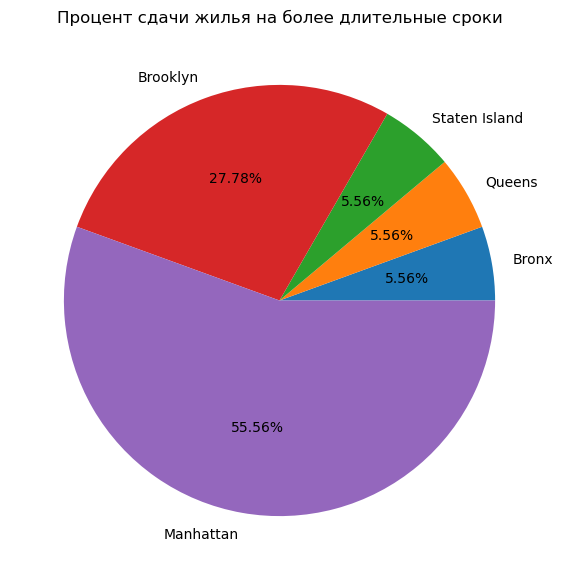

In [39]:
g1=data.groupby('neighbourhood_group')['minimum_nights'].median().sort_values().to_frame().reset_index()

plt.figure(figsize = [7, 7])

plt.pie(
    x = g1['minimum_nights'],
    labels = g1['neighbourhood_group'],
    explode = [0, 0, 0, 0, 0], 
    autopct = '%1.2f%%',
    pctdistance = 0.6,
    labeldistance = 1.1,
)

plt.title('Процент сдачи жилья на более длительные сроки')
plt.show()

- Предположительно в Манхэттене сдают квартиры на более длительный срок из-за цен на недвижиммость. Поэтому владельцы не хотят рисковать и сдавать посуточно. Также цены на клининг, лучше убирать спустя неделю жилья, чем тратить на клининг каждый день

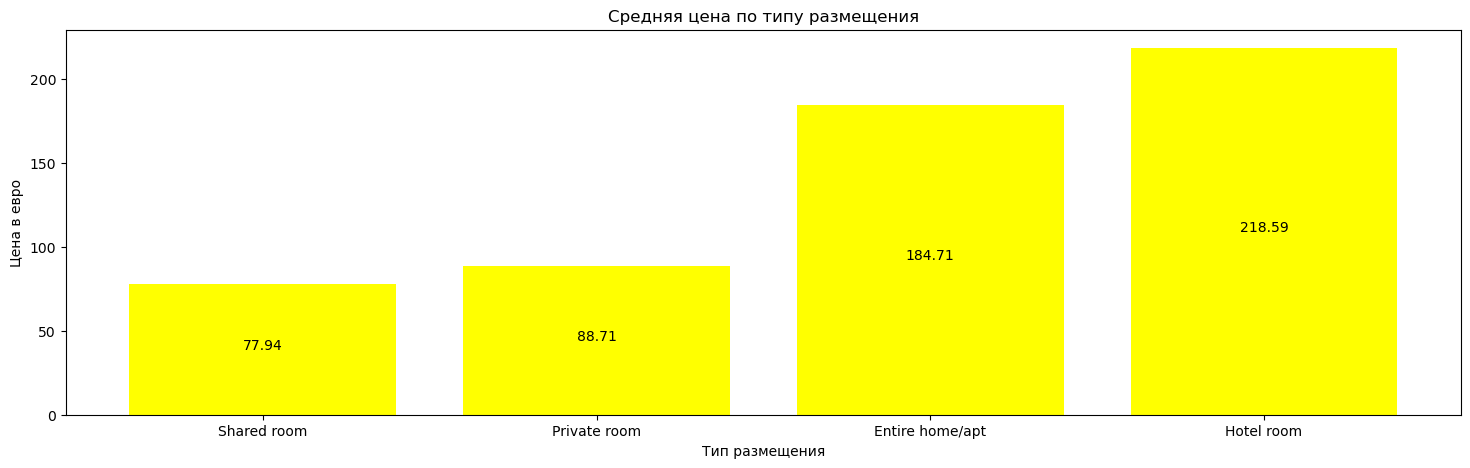

In [40]:
g2=data.groupby('room_type')['price'].mean().sort_values().to_frame().reset_index()

plt.figure(figsize = [18, 5])
plt.bar(g2['room_type'], g2['price'], color = 'yellow')

for i in range(g2['price'].shape[0]):
    plt.text(
        i, 
        round(g2['price'].iloc[i] / 2, 2),
         round(g2['price'].iloc[i], 2), 
        ha = 'center'
    )

plt.ylabel('Цена в евро')
plt.xlabel('Тип размещения')
plt.title('Cредняя цена по типу размещения')
plt.show()

- Самым дорогим размещением в Нью-Йорке является номер отеля, а самым дешевым хостел

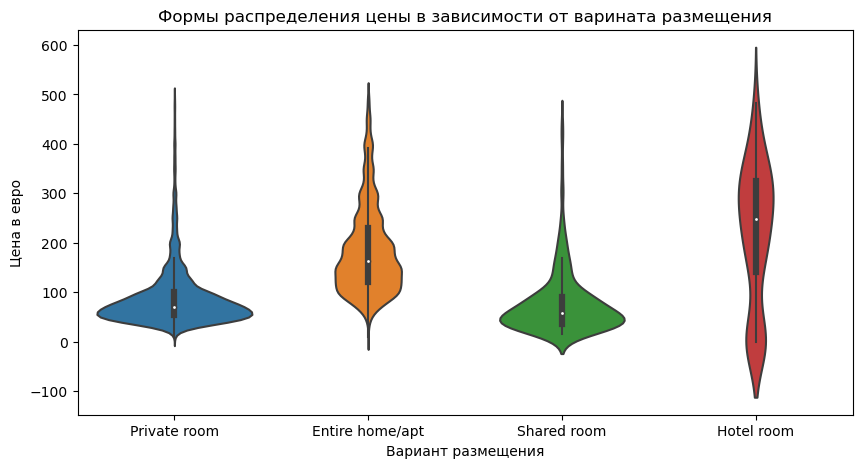

In [41]:
plt.figure(figsize = [10, 5])
sns.violinplot(data=data, x="room_type", y="price")
plt.title('Формы распределения цены в зависимости от варината размещения')
plt.xlabel('Вариант размещения')
plt.ylabel('Цена в евро')
plt.show()

- Как видно из скрипичных графиков, у каждого размещения своя медианная цена и интерквартильный размах. Все это зависит от уровня размещения, причем чем выше уровень тем дороже становится и тем меньше коллебается цена

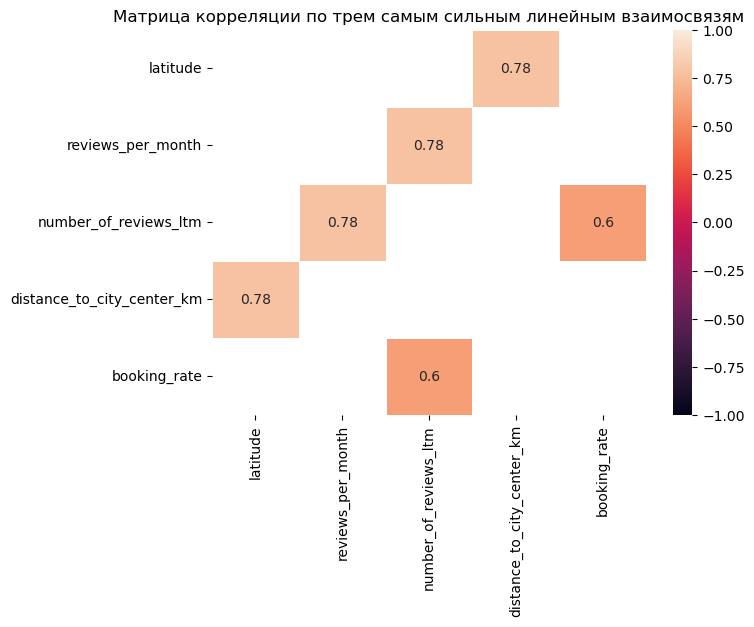

In [42]:
c=data.corr()
c=c[(c>=a.head(3)[0].min()) & (c!=1)]
x=c.columns
for i in x:
    if len(c[i].unique())==1:
        c=c.drop(columns=i)
    if len(c.loc[i].unique())==1:
        c=c.drop(index=i)
        
plt.figure(figsize = [7, 5])
sns.heatmap(
    c, 
    linewidths = 0.5, 
    annot = True,
    vmax = 1,
    vmin = -1,
    linecolor = "white",
    annot_kws = {'size': 10}
)
plt.title('Матрица корреляции по трем самым сильным линейным взаимосвязям')
plt.show()

- Как видно из матрицы корреляции, 3 самых сильных линейных зависимостей вычисляются через друг друга, поэтому индекс корреляции большой

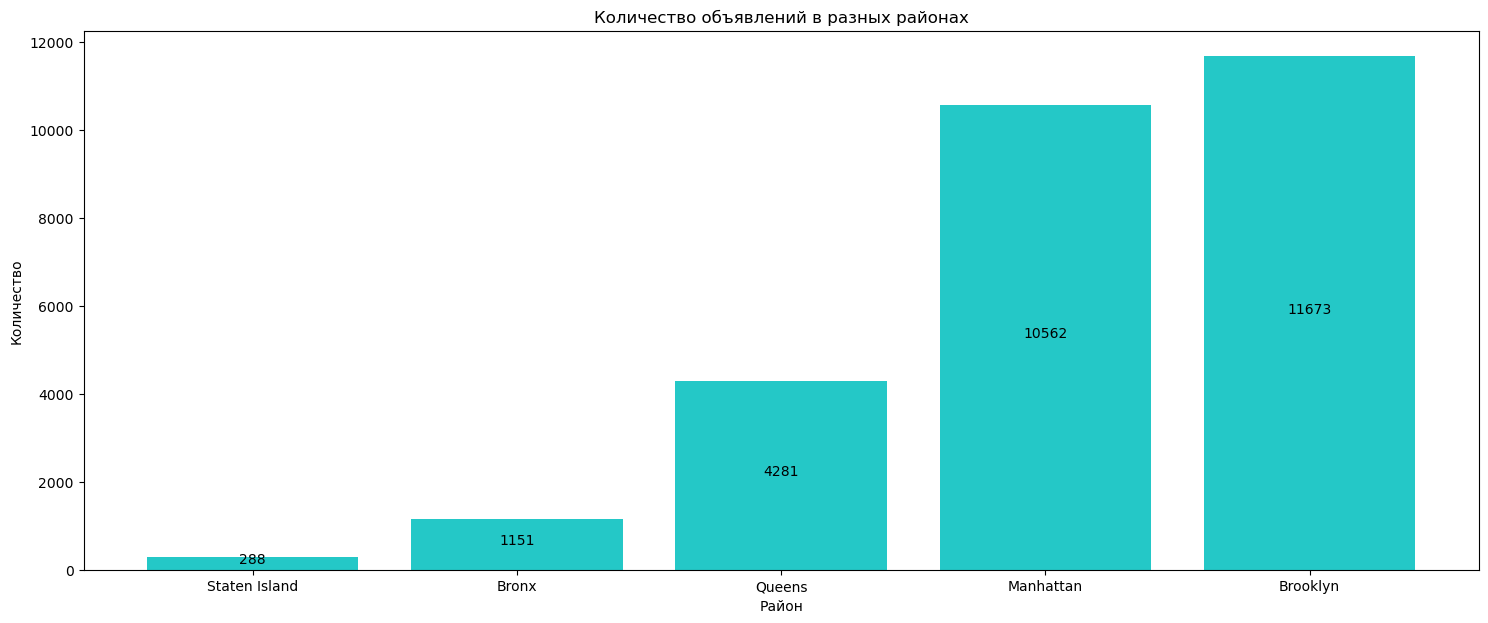

In [43]:
g5=data[['neighbourhood_group', 'id']].groupby('neighbourhood_group').count().sort_values(by='id').reset_index()

plt.figure(figsize = [18, 7])
plt.bar(g5['neighbourhood_group'], g5['id'], color = '#24c8c7')

for i in range(g5['id'].shape[0]):
    plt.text(
        i, 
        g5['id'].iloc[i] / 2,
        g5['id'].iloc[i], 
        ha = 'center'
    )

plt.ylabel('Количество')
plt.xlabel('Район')
plt.title('Количество объявлений в разных районах')
plt.show()

- Как видно из графика больше всего размещений предлагает Бруклин, а самое меньшее значение равное 288 у Статен-Айленд, так как этот район меньше всего [заселен](https://ru.wikipedia.org/wiki/Статен-Айленд)

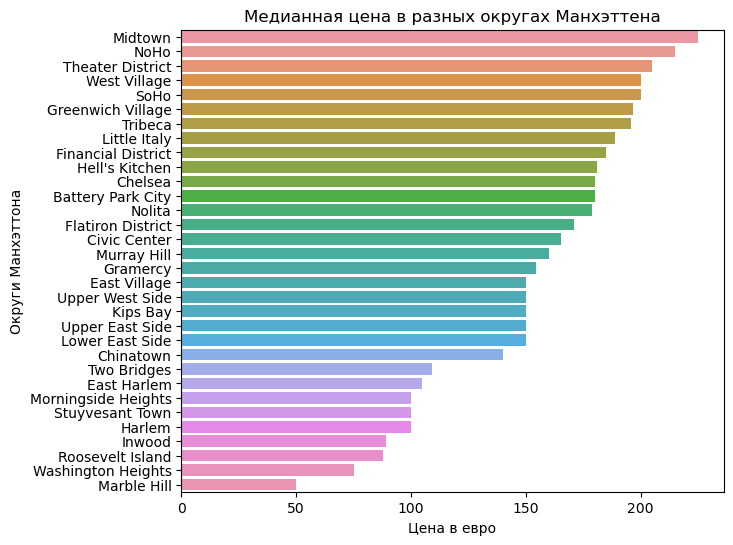

In [44]:
g6=data[data.neighbourhood_group=='Manhattan']
g6=g6[['price', 'neighbourhood']].groupby('neighbourhood').median().sort_values(by='price',  ascending=False).reset_index()

plt.figure(figsize = [7, 6])
sns.barplot(data=g6, x="price", y="neighbourhood")
plt.title('Медианная цена в разных округах Манхэттена')
plt.xlabel('Цена в евро')
plt.ylabel('Округи Манхэттона')
plt.show()

- Как видно из графика, в самом дорогом районе Нью-Йорка, самым дорогим округом является Мидтаун. Неудивительно, там находится центральный вокзал, Эмпайр-стейт-билдинг, Таймс-сквер

**Критерии оценки:**

* Создание 6 содержательных визуализаций с использованием не менее 4 разных типов диаграмм.
* Грамотное оформление визуализаций, с соблюдением всех правил.
* Содержательная текстовая интерпретация для каждой визуализации, объясняющая выводы на основе графика.

## Задание 8 (1 балл): Немного исследований

* Исследуйте данные, используя различные методы анализа и визуализации, чтобы найти какую-нибудь интересную особенность. Это может быть связь между двумя переменными, неожиданный паттерн или что-то еще.

* Проанализируйте и визуализируйте найденную особенность. Используйте различные методы визуализации, если это необходимо.

* Предложите объяснение, почему такая особенность существует. Это может быть ваше предположение или результат анализа.

**Пример:**

Предположим, мы обнаружили интересный факт: районы с высоким средним уровнем цен на жилье имеют более низкий процент доступных объектов на протяжении всего года.

- Обычно элитные районы находятся ближе к центру города, из-за этого их цена растет. Но при анализе корреляции линейная взаимосвязь была крайне мала, и меня это удивило. Исследуем эту особенность

In [45]:
df1=data[['distance_to_city_center_km', 'neighbourhood_group']].groupby('neighbourhood_group').median().sort_values(by='distance_to_city_center_km',  ascending=False).reset_index()
df2=data[['neighbourhood_group', 'price']].groupby('neighbourhood_group').median().sort_values(by='price').reset_index()
df3=pd.merge(df1, df2)

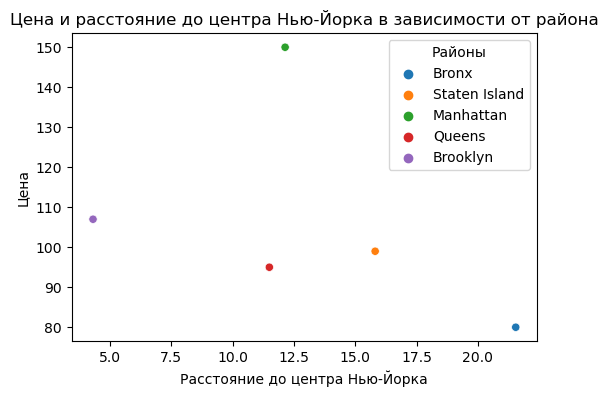

In [46]:
plt.subplots(figsize=(6, 4))
ax=sns.scatterplot(data=df3, x="distance_to_city_center_km", y="price", hue="neighbourhood_group")
ax.legend(title='Районы')
plt.xlabel('Расстояние до центра Нью-Йорка')
plt.ylabel('Цена')
plt.title('Цена и расстояние до центра Нью-Йорка в зависимости от района')
plt.show()

**Вывод:** В Нью-Йорке линейной зависисмоти между расстоянием до центра и ценой нету. Например Бруклин находится ближе к центру, но цена на размещение намного ниже чем в Манхэттане, который дальше. Это связанно с тем, что в Манхэттене находится большая часть турристических объектов, которая и привлекает туристов, и все они почти будут в пешей доступности, поэтому цена в этом районе больше, чем в бруклине, размещения которого находятся ближе всего к центру.

**Критерии оценки:**

* Найдена интересная особенность в данных.
* Выполнены расчеты и предоставлены визуализации, подтверждающие найденную особенность.
* Предложено объяснение

## Бонус (0.1 балла):
Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ:

![](https://sun9-7.userapi.com/impg/mA3Sd9cgKS8eZuFTcEPvamQDnKx59p3AkClE4A/tkemPb3XTK8.jpg?size=538x495&quality=96&sign=f67d0e27725fca2205da0f6a10d4a8ac&type=album)